# Let's add Noise

In [1]:
%matplotlib notebook

In [2]:
# imports
from matplotlib import pyplot as plt
from importlib import reload
from pkg_resources import resource_filename

import numpy as np

from unetabs import fauxspec
from unetabs import spectraunet
import torch

## One spectrum

In [19]:
reload(fauxspec)
all_flux, all_lbl, ran_s2n = fauxspec.noisy(nsample=1, seed=3)
ran_s2n

0


array([12.36356434])

In [20]:
all_flux.shape

(4096, 1)

### View

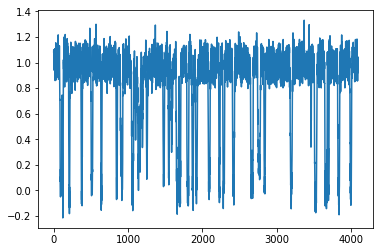

In [21]:
plt.clf()
ax = plt.gca()
ax.plot(all_flux[:,0])
#
plt.show()

## Checking results (run on Nautilus)

### Build a test set

In [3]:
reload(fauxspec)
tst_flux, tst_lbl, tst_s2n = fauxspec.noisy(nsample=1000, seed=1234, verbose=False)

### Build/Load the model

In [4]:
noisy_model = resource_filename('unetabs', 'data/models/noisy_model.pt')

In [5]:
model = spectraunet.SpectraUNet()

In [6]:
model.load_state_dict(torch.load(noisy_model, map_location='cpu'))
model.eval()

SpectraUNet(
  (dconv_down1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1))
    (1): ReLU(inplace)
    (2): Conv2d(16, 16, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1))
    (3): ReLU(inplace)
  )
  (dconv_down2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1))
    (1): ReLU(inplace)
    (2): Conv2d(32, 32, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1))
    (3): ReLU(inplace)
  )
  (dconv_down3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1))
    (3): ReLU(inplace)
  )
  (maxpool): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
  (upsample): Upsample(scale_factor=(1, 2), mode=bilinear)
  (dconv_up2): Sequential(
    (0): Conv2d(96, 32, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1))
    (1): ReLU(inplace)
    (2): Conv2d(32,

### Run on a spectrum

In [13]:
tst_s2n[0]

6.255830656441169

In [9]:
tst_spec = tst_flux[:,0]
pred = model.apply_to_spec(tst_spec)

/home/xavier/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


### View

<IPython.core.display.Javascript object>


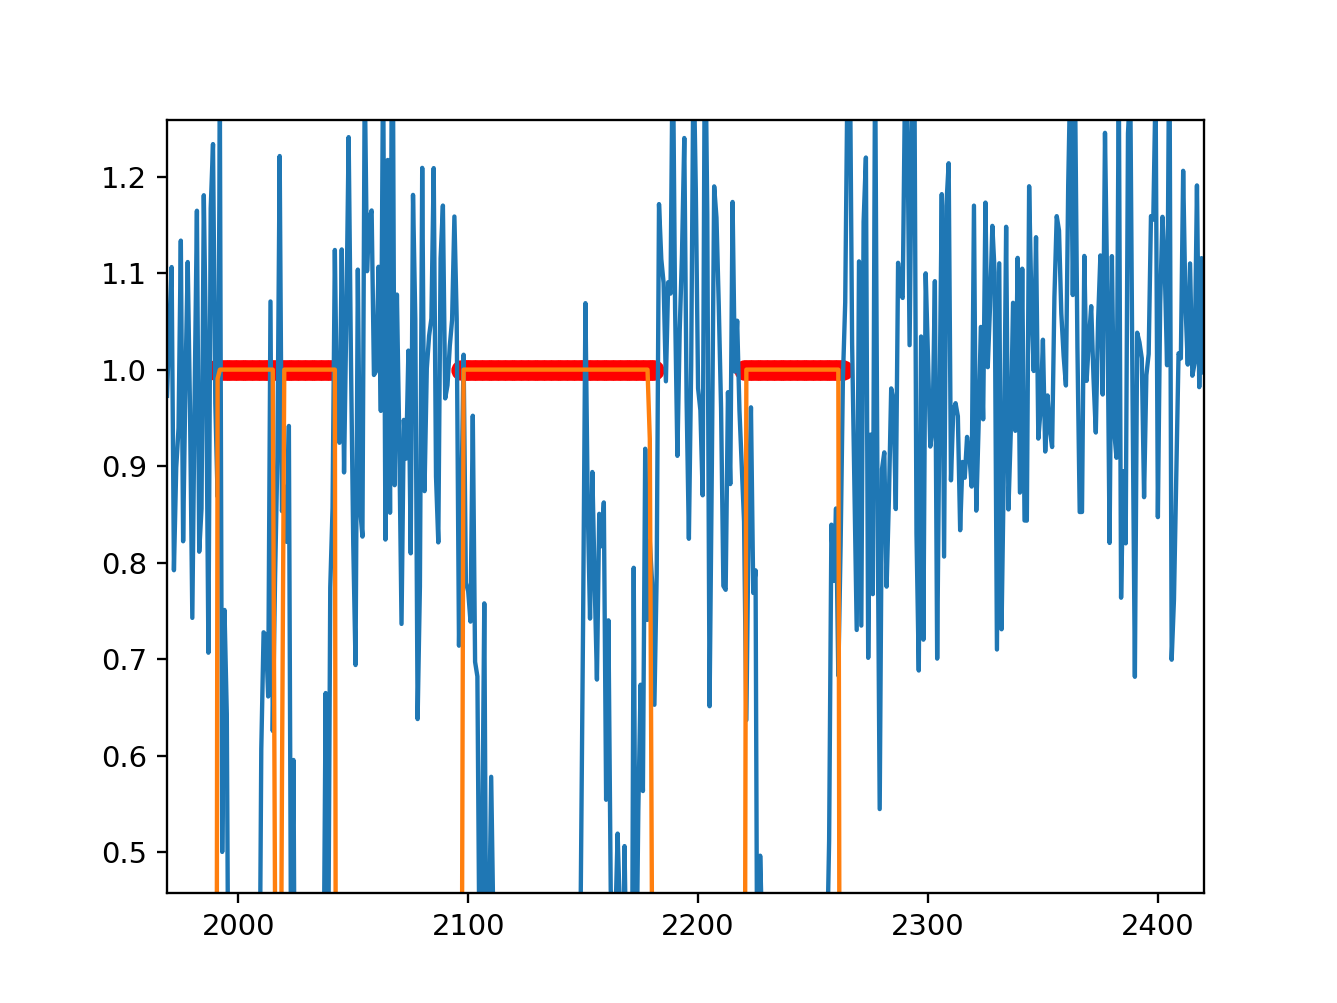

In [14]:
plt.clf()
ax = plt.gca()
ax.plot(tst_spec)
ax.plot(np.minimum(pred, 1.))
ax.scatter(np.arange(tst_spec.size), tst_lbl[:,0], color='red')
ax.set_ylim(-0.1, 1.2)
#
plt.show()

## Let's try another (lower s2n)